In [1]:
#importing libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz  
import graphviz

In [2]:
df = pd.read_csv('autompg-dataset/auto-mpg.csv') #reading csv file

# Overview of Dataset

In [3]:
df.head(10) #first ten data from data set

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [4]:
df.info() #to see datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


'**horsepower**' and '**car name**' have object values. We need to convert '**horsepower**' into float value. Again '**car name**' columns has object value, we need to extract the exact name of the car. 

In [5]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

**'?'** is not a **value**. It should be removed by a **float value**. 

In [6]:
df['horsepower'] = df['horsepower'].replace('?', np.NaN).astype(np.float)

In [7]:
df['horsepower'].dtype

dtype('float64')

'**horsepower**' datatype is converted from object type to **float type**

In [8]:
df['horsepower'].isnull().sum()

6

so we have **6 null values**. we need to fill them with **mean**

In [9]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)

we successfully replaced null values with **mean** 

# Feature extraction

It's time to extract the **car name** from a **long string data**..

In [10]:
df['make'] = df['car name'].apply(lambda x : re.match(r'^\w+',x).group(0))

In [11]:
df['make']

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: make, Length: 398, dtype: object

In [12]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,make
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,ford
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,vw
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,ford


In [13]:
dataset = df.drop('car name', axis = 1)

In [14]:
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford


let's see the **correlation** between the features by a **heatmap**

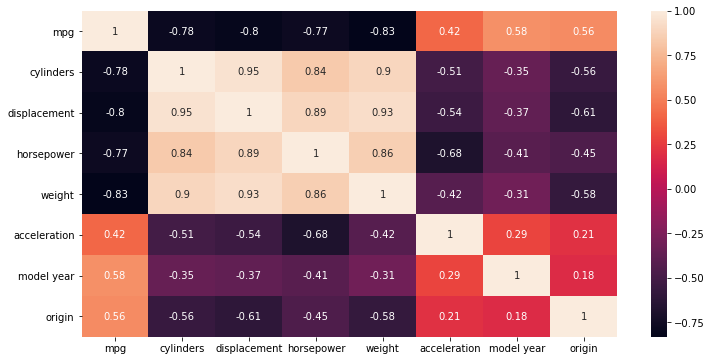

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), annot = True)

**mpg** is strongly correlated with **cylinders, displacement, weight**

lets see the **pair plot** to see the relation between the **features**

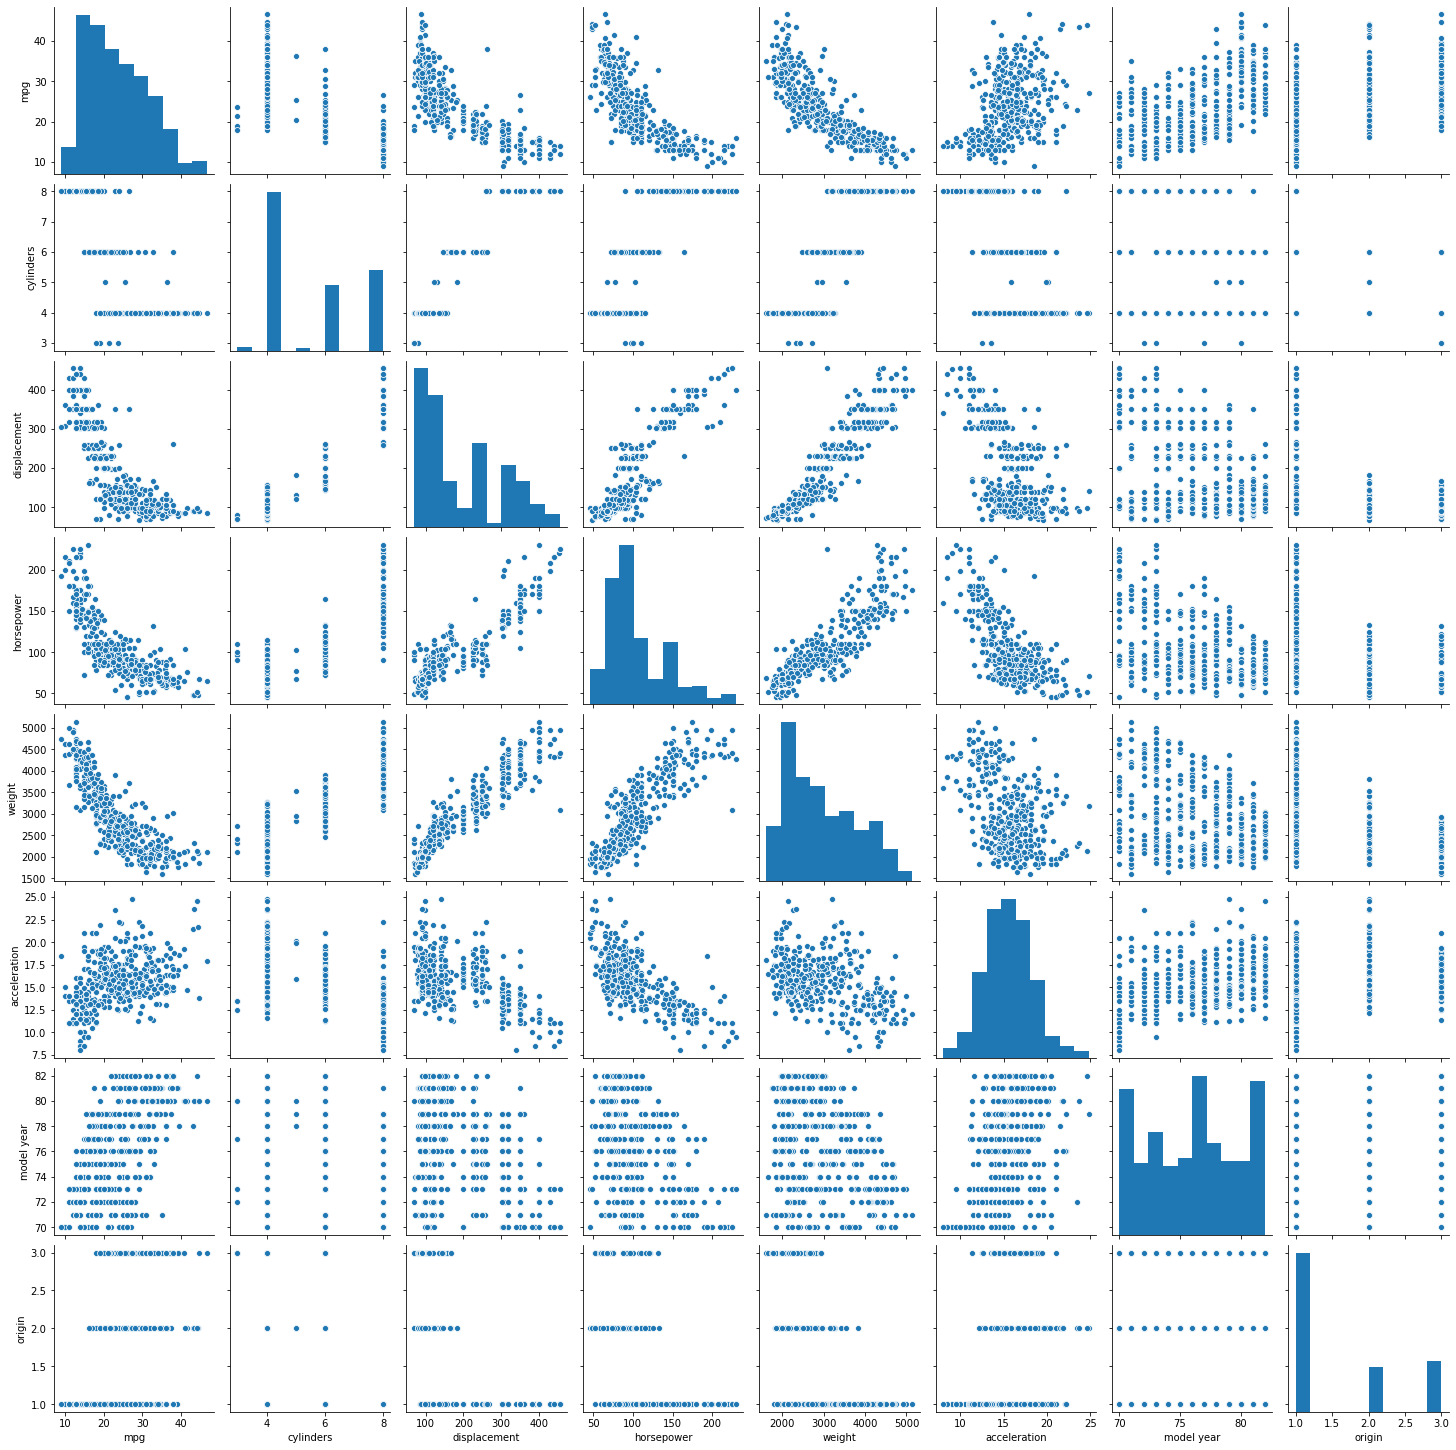

In [16]:
sns.pairplot(dataset)

**cylinders, displacement, weight** are linearly correlated with **mpg**. We can apply **Regression Algorithm** to predict** mpg**

In [17]:
X = dataset.drop('mpg', axis = 1)
y = dataset['mpg']

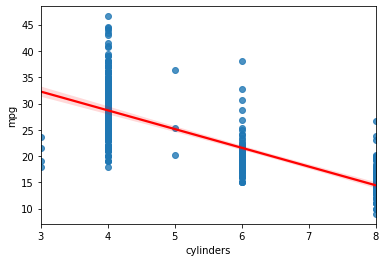

In [18]:
sns.regplot(x='cylinders', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

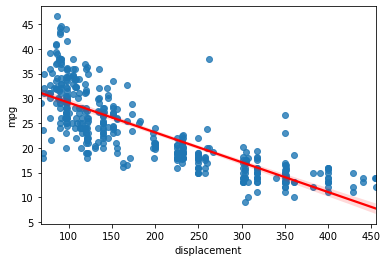

In [19]:
sns.regplot(x='displacement', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

scatters seem have non linearity.. we can log transformation to make relation Linear

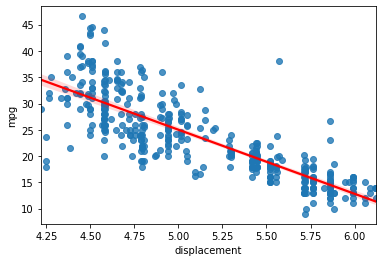

In [20]:
dataset['displacement'] = np.log(dataset['displacement'])
sns.regplot(x='displacement', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

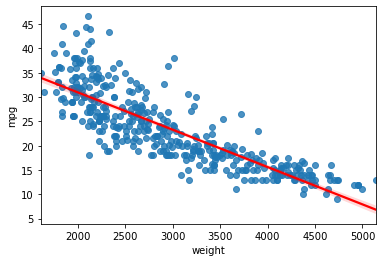

In [21]:
sns.regplot(x='weight', y='mpg',data=dataset, line_kws={"color": "red"})
#plt.plot(scatter_kws='r')
plt.show()

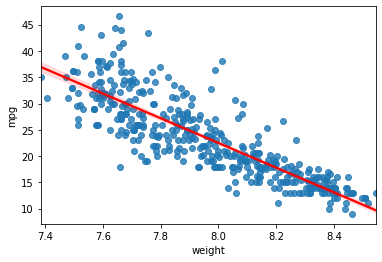

In [22]:
dataset['weight'] = np.log(dataset['weight']) 
sns.regplot(x='weight', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

Let's split the dataset into train set and and test set 

In [23]:
feature = ['cylinders', 'displacement', 'weight']
X[feature] = np.log(X[feature])
y = np.log(y)
X[feature]

,cylinders,displacement,weight
0,2.079442,5.726848,8.161660
1,2.079442,5.857933,8.214194
2,2.079442,5.762051,8.142063
3,2.079442,5.717028,8.141190
4,2.079442,5.710427,8.145840
...,...,...,...
393,1.386294,4.941642,7.933797
394,1.386294,4.574711,7.663877
395,1.386294,4.905275,7.738488
396,1.386294,4.787492,7.872836


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X[feature], y, train_size = 0.7, random_state = 1)

Let's fit our dataset into linear regression model and predict...

# Linear Model

In [25]:
Linear_Model = LinearRegression()
Linear_Model.fit(X_train, y_train)
y_predict = Linear_Model.predict(X_test)

In [26]:
#print(mean_squared_error(y_test, y_predict))
print(r2_score(y_test, y_predict))
#print(Linear_Model.score(X_train, y_train))

0.8058911983686478


If we consider all features...

In [27]:
dataset.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'make'],
      dtype='object')

In [28]:
feature_all = ['cylinders', 'displacement', 'weight','horsepower','acceleration', 'model year', 'origin']
X_all = dataset[feature_all]
y_all = np.log(dataset['mpg'])

In [29]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, train_size=0.7, random_state = 1 ) 

In [30]:
Linear_Model.fit(X_all_train, y_all_train)
y_all_predict = Linear_Model.predict(X_all_test)

In [31]:
#print(mean_squared_error(y_all_test, y_all_predict))
print('linear model r2 score: ',r2_score(y_all_test, y_all_predict))
#print(Linear_Model.score(X_all_train, y_all_train))

linear model r2 score:  0.8930042820612767


# Decision Tree Model

In [32]:
tree_model = DecisionTreeRegressor(criterion='mse', max_depth = 5)
tree_model.fit(X_all_train, y_all_train)
#print('tree model score: ',tree_model.score(X_all_train, y_all_train))
print('tree model r2 score: ', r2_score(y_all_test, y_all_predict))

tree model r2 score:  0.8930042820612767


In [33]:
#tree_graph = export_graphviz(tree_model, out_file= None, max_depth = 5, filled=True, rounded=True, 
    #                         special_characters=True, feature_names = feature)
#graphviz.Source(tree_graph)

# Random Forest Regressor

In [34]:
rf_model = RandomForestRegressor()
rf_model.fit(X_all_train, y_all_train)
#print('rf model score: ',rf_model.score(X_all_train, y_all_train))
print('rf model r2 score: ', r2_score(y_all_test, y_all_predict))

rf model r2 score:  0.8930042820612767
